In [126]:
import PIL
import torchvision.transforms as transforms
import cv2
import math
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; import matplotlib.pylab as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns; sns.set()
import itertools
from torchvision.models import resnet152
import torch
datas = ['mini_test', 'crop','euro', 'isic', 'chest']
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15

In [ ]:
for idx in range(5):
    plt.imshow(x_support[idx].cpu().permute(1, 2, 0))
    plt.show()

## clustering measure between support samples

In [244]:
# 1 shot -> 당연히 0이 나옴...
C = 5
N = 1
df = pd.DataFrame(None, columns = datas, index = [i for i in range(10)])
for data in datas:
    path = './logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_001shot_head_default/feature/{}_support.npy'
    for i in range(10):
        denom = [] # 분모
        numer = [] # 분자
        support = np.load(path.format(data, i))
        mu = support.mean(axis=0).mean(axis=0)
        mu_i_arr = support.mean(axis=1)
        for cls in range(C):  
            index = [C*i + cls for i in range(N)]
            in_class = support[index]
            mu_i = np.mean(in_class, axis = 0)
            denom.append(np.linalg.norm(mu-mu_i) ** 2)
            for sample_idx in range(N):
                sample = in_class[sample_idx]
                numer.append(np.linalg.norm(sample-mu_i) ** 2)
        #print("episode {}".format(i))
        cluster_measure = C * sum(numer) / (N * sum(denom))
        #print("cluster measure : {:.4f}".format(cluster_measure))
        df.loc[i, data] = cluster_measure
df

,mini_test,crop,euro,isic,chest
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0


In [245]:
# 5 shot
C = 5
N = 5
df = pd.DataFrame(None, columns = datas, index = [i for i in range(10)])
for data in datas:
    path = './logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_005shot_head_default/feature/{}_support.npy'
    for i in range(10):
        denom = [] # 분모
        numer = [] # 분자
        support = np.load(path.format(data, i))
        mu = support.mean(axis=0)
        mu_i_arr = support.mean(axis=1)
        for cls in range(C):
            index = [C*i + cls for i in range(N)]
            in_class = support[index]
            mu_i = np.mean(in_class, axis = 0)
            denom.append(np.linalg.norm(mu-mu_i) ** 2)
            for sample_idx in range(N):
                sample = in_class[sample_idx]
                numer.append(np.linalg.norm(sample-mu_i) ** 2)
        #print("episode {}".format(i))
        cluster_measure = C * sum(numer) / (N * sum(denom))
        #print("cluster measure : {:.4f}".format(cluster_measure))
        df.loc[i, data] = cluster_measure
df.index = ["support_{}".format(i) for i in range(10)]
df

,mini_test,crop,euro,isic,chest
support_0,50.720161,34.236298,33.489166,22.829445,28.898595
support_1,38.625194,29.758449,32.416482,30.304404,33.631042
support_2,51.658319,30.760557,35.999479,25.423304,24.593645
support_3,36.109914,25.572603,31.922523,26.561776,20.170266
support_4,44.143757,30.058215,29.906265,24.265734,22.937267
support_5,48.972895,25.202279,28.805999,31.457153,23.681867
support_6,49.444114,28.728323,26.854872,28.043362,22.124514
support_7,50.452999,28.188479,32.68619,30.973114,27.22767
support_8,41.317279,27.841243,34.776592,29.878736,22.768228
support_9,40.360792,31.719244,33.107412,29.925272,23.344655


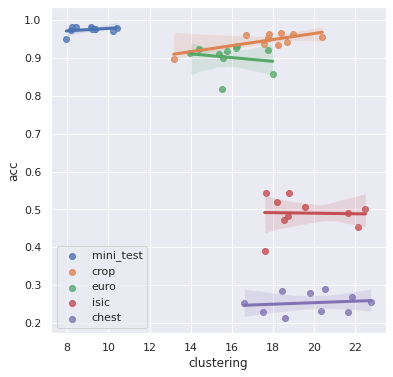

In [228]:
# 5 shot
# 각 support에 대해 query의 평균임
plt.rcParams["figure.figsize"] = (6, 6)
for data in datas:
    acc_path = './logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_005shot_head_default/sq_test_acc.csv'
    test_acc = pd.read_csv(acc_path.format(data), index_col='Unnamed: 0')
    support_acc = test_acc.mean(axis=1)
    pair_df = pd.concat([df.loc[:,data].astype(float), support_acc], axis=1)
    pair_df.columns = ["clustering", "acc"]
    sns.regplot(x='clustering', y='acc', data=pair_df, label = data)
plt.legend()
#     plt.title(data)
#     plt.show()
# df

## clustering measure between query samples

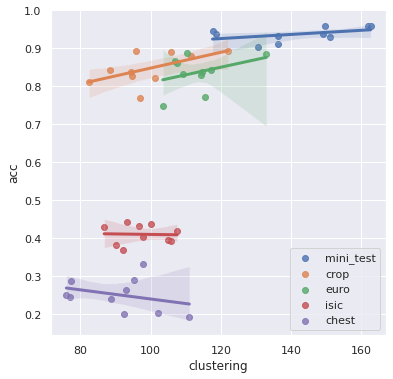

In [255]:
C = 5
N = 15
df = pd.DataFrame(None, columns = datas, index = [i for i in range(10)])
for data in datas:
    path = './logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_001shot_head_default/feature/{}_query.npy'
    for i in range(10):
        denom = [] # 분모
        numer = [] # 분자
        query = np.load(path.format(data, i))
        mu = query.mean(axis=0)
        mu_i_arr = query.mean(axis=1)
        for cls in range(C):
            index = [C*i + cls for i in range(N)]
            in_class = query[index]
            mu_i = np.mean(in_class, axis = 0)
            denom.append(np.linalg.norm(mu-mu_i) ** 2)
            for sample_idx in range(N):
                sample = in_class[sample_idx]
                numer.append(np.linalg.norm(sample-mu_i) ** 2)
        #print("episode {}".format(i))
        cluster_measure = C * sum(numer) / (N * sum(denom))
        #print("cluster measure : {:.4f}".format(cluster_measure))
        df.loc[i, data] = cluster_measure
df.index = ["query_{}".format(i) for i in range(10)]

# 각 query 대해 support의 평균임
plt.rcParams["figure.figsize"] = (6, 6)
for data in datas:
    acc_path = './logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_001shot_head_default/sq_test_acc.csv'
    test_acc = pd.read_csv(acc_path.format(data), index_col='Unnamed: 0')
    query_acc = test_acc.mean(axis=0)
    pair_df = pd.concat([df.loc[:,data].astype(float), query_acc], axis=1)
    pair_df.columns = ["clustering", "acc"]
    sns.regplot(x='clustering', y='acc', data=pair_df, label = data)
plt.legend()

In [252]:
C = 5
N = 15
df = pd.DataFrame(None, columns = datas, index = [i for i in range(10)])
for data in datas:
    path = './logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_005shot_head_default/feature/{}_query.npy'
    for i in range(10):
        denom = [] # 분모
        numer = [] # 분자
        query = np.load(path.format(data, i))
        mu = query.mean(axis=0)
        mu_i_arr = query.mean(axis=1)
        for cls in range(C):
            index = [C*i + cls for i in range(N)]
            in_class = query[index]
            mu_i = np.mean(in_class, axis = 0)
            denom.append(np.linalg.norm(mu-mu_i) ** 2)
            for sample_idx in range(N):
                sample = in_class[sample_idx]
                numer.append(np.linalg.norm(sample-mu_i) ** 2)
        #print("episode {}".format(i))
        cluster_measure = C * sum(numer) / (N * sum(denom))
        #print("cluster measure : {:.4f}".format(cluster_measure))
        df.loc[i, data] = cluster_measure
df.index = ["query_{}".format(i) for i in range(10)]
df

,mini_test,crop,euro,isic,chest
query_0,139.63307,109.252694,115.078298,101.596073,78.850672
query_1,136.506107,107.363811,131.762785,77.91534,108.75777
query_2,168.159181,93.849327,104.48122,81.221176,104.762733
query_3,145.024056,101.095399,131.852765,93.665307,61.055263
query_4,125.626903,103.638086,88.358059,89.324575,102.682739
query_5,141.151042,93.159209,98.957154,98.124167,88.61676
query_6,143.49885,97.794465,135.300583,72.386344,75.641222
query_7,146.73047,102.109234,95.031803,89.716773,85.559118
query_8,148.48674,101.212166,112.731046,79.410059,91.354355
query_9,114.394582,105.03157,112.540356,96.30217,83.734556


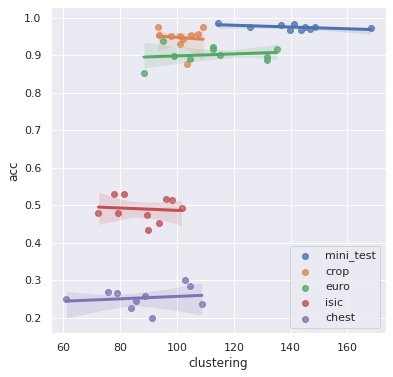

In [253]:
# 5 shot
# 각 query 대해 support의 평균임
plt.rcParams["figure.figsize"] = (6, 6)
for data in datas:
    acc_path = './logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_005shot_head_default/sq_test_acc.csv'
    test_acc = pd.read_csv(acc_path.format(data), index_col='Unnamed: 0')
    query_acc = test_acc.mean(axis=0)
    pair_df = pd.concat([df.loc[:,data].astype(float), query_acc], axis=1)
    pair_df.columns = ["clustering", "acc"]
    sns.regplot(x='clustering', y='acc', data=pair_df, label = data)
plt.legend()


#### 동일한 이미지인지 확인

In [176]:
for data in datas : 
    x_support_list = []
    x_query_list = []
    for i in range(10):
        path = './logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_001shot_head_default/saved_0{}.txt'.format('crop', i)
        with open(path, 'rb') as f:
            test_acc = pickle.load(f)
            x_support = pickle.load(f)
            for img in x_support:
                x_support_list.append(img)
            y_support = pickle.load(f)
            x_query = pickle.load(f)
            for img in x_query:
                x_query_list.append(img)
    # check
    all_imgs_value = []
    all_imgs = x_support_list + x_query_list
    for img in all_imgs:
        all_imgs_value.append(img.sum().cpu().item())
    if len(all_imgs_value) == len(set(all_imgs_value)):
        print("[{}] : all imgs are different!".format(data))
    else:
        print("[{}] : there are the same img pair".format(data))

EOFError: Ran out of input

In [84]:
len(set(all_imgs_value))

751

In [ ]:
count={}
lists = all_imgs_value
for i in lists:
    try: count[i] += 1
    except: count[i]=1
print(count)

### Cosine Similarity between Support Samples (Features)

<AxesSubplot:>

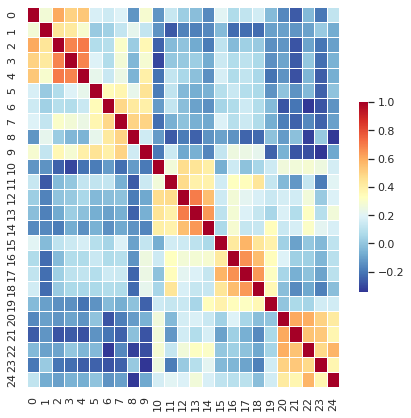

In [138]:
path = './logs/baseline/output/torch_resnet18_simclr_LS_default/mini_test/05way_005shot_head_default/feature/0_support.npy'
support = np.load(path)
fig, ax = plt.subplots( figsize=(7,7) )
# naive similarity btw all 25 samples
#support_all = support.swapaxes(0,1).reshape(25, 512)
sim = cosine_similarity(support, support)
sns.heatmap(sim, 
            cmap = 'RdYlBu_r', 
            #annot = True,   # 실제 값을 표시한다
            #mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = sim.min(), vmax = sim.max()   # 컬러바 범위 -1 ~ 1
           )  
# in-class similarity

## Hardness between Support and Query

In [190]:
def get_classifier(yh, y): # support_features, y_support

    classifier = torch.zeros((y.unique().size(0), yh.size(1))) # (5, 1000)
    for cls in torch.sort(y.unique())[0]:
        classifier[cls] = yh[y == cls].mean(dim=0) # z(x,theta)
    classifier = torch.nn.functional.normalize(classifier) # ReLU + l2 normalize
    return classifier

def get_hardness(x_support, y_support, x_query, y_query):
    with torch.no_grad():
        yhs_list = []
        # for feature in x_support: # 크기 최대 75씩 자름, zip : (x,y)가 최대 75개 
        #     yhs_list.append(torch.from_numpy(feature))

        support_features = torch.from_numpy(x_support)

        w = get_classifier(support_features, y_support) # w 계산 

        yhq_list = []
        # for feature in x_query: # 크기 최대 75씩 자름, zip : (x,y)가 최대 75개 
        #     yhq_list.append(torch.from_numpy(feature))
        query_features = torch.from_numpy(x_query) 
        phi = torch.nn.functional.normalize(query_features) # phi : l2 norm normalized
        # class개수 * class 개수 (5 x 5) 

        z = phi @ w.t() # z_y = w * phi(x)   (75, 5)

        p = torch.softmax(z, dim=1) # p(.|x) (75, 5)
        p = p[torch.arange(0, y_query.size(0)), y_query] #p(y|x)
        
        hardness = ((1. - p) / p).log().mean().item()
    return hardness 

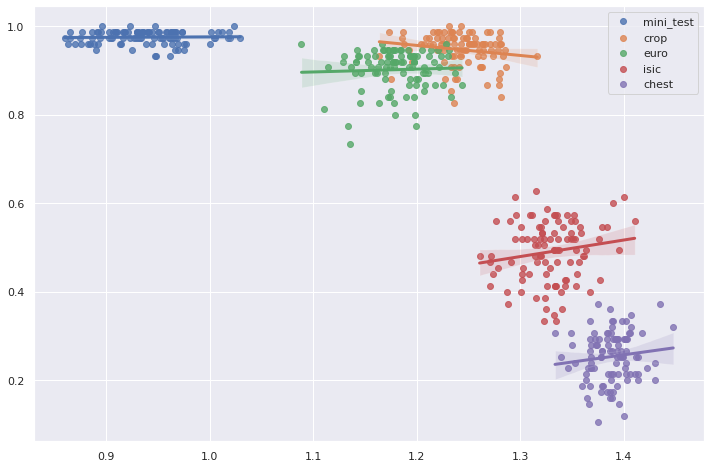

In [223]:
# 1shot
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['lines.linewidth'] = 2

for data in datas:
    df = pd.DataFrame(None, columns = range(10), index = range(10))
    path = './logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_001shot_head_default/feature/{}_{}.npy'
    acc_path = './logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_005shot_head_default/sq_test_acc.csv'.format(data)
    test_acc = pd.read_csv(acc_path.format(data), index_col='Unnamed: 0')
    for support_episode in range(10):
        for query_episode in range(10):
            x_support = np.load(path.format(data, support_episode,'support'))
            x_query = np.load(path.format(data, query_episode, 'query'))
            y_support = torch.arange(5).repeat_interleave(1)
            y_query = torch.arange(5).repeat_interleave(15)

            hardness = get_hardness(x_support, y_support, x_query, y_query)
            df.loc[support_episode, query_episode] = hardness
    sns.regplot(x=df.values.reshape(-1).astype(float), y=test_acc.values.reshape(-1).astype(float), label = data)
    plt.legend()

Text(0, 0.5, 'Accuracy')

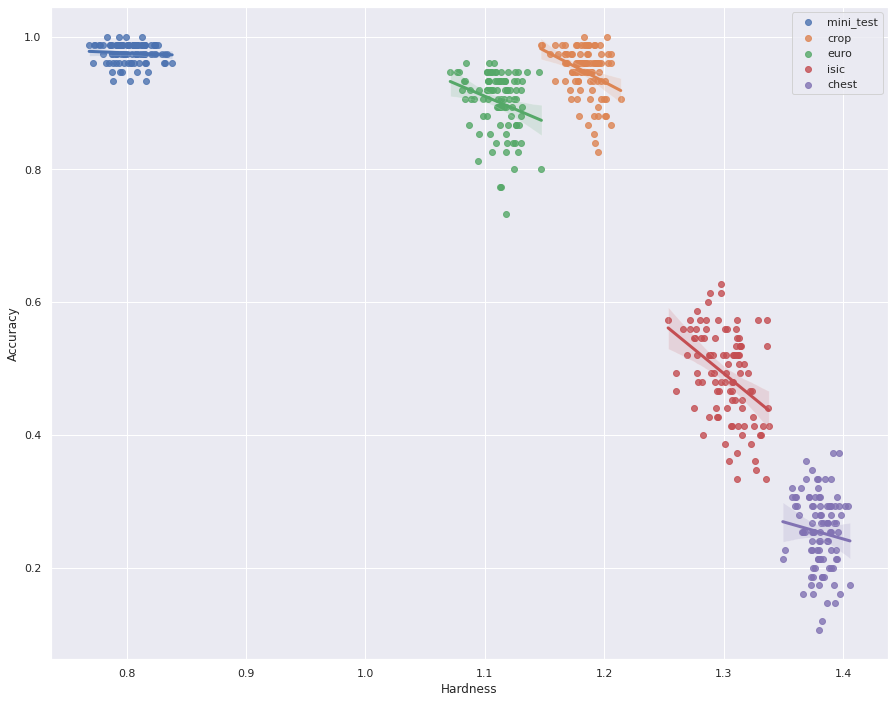

In [225]:
# 5shot
plt.rcParams["figure.figsize"] = (15,12)
plt.rcParams['lines.linewidth'] = 2

for data in datas:
    df = pd.DataFrame(None, columns = range(10), index = range(10))
    path = './logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_005shot_head_default/feature/{}_{}.npy'
    acc_path = './logs/baseline/output/torch_resnet18_simclr_LS_default/{}/05way_005shot_head_default/sq_test_acc.csv'.format(data)
    test_acc = pd.read_csv(acc_path.format(data), index_col='Unnamed: 0')
    for support_episode in range(10):
        for query_episode in range(10):
            x_support = np.load(path.format(data, support_episode,'support'))
            x_query = np.load(path.format(data, query_episode, 'query'))
            y_support = torch.arange(5).repeat_interleave(5)
            y_query = torch.arange(5).repeat_interleave(15)

            hardness = get_hardness(x_support, y_support, x_query, y_query)
            df.loc[support_episode, query_episode] = hardness
    sns.regplot(x=df.values.reshape(-1).astype(float), y=test_acc.values.reshape(-1).astype(float), label = data)
    plt.legend()
plt.xlabel('Hardness')
plt.ylabel('Accuracy')